In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Filepaths

# Leads to where the original parquet train and test is located
DATA_DIR = "/Users/yaseminates/Desktop/COPY-ESA-Spacecraft-Anomaly-Challenge/COPY-Data"

# Leads to where you would like to output the notebook
OUTPUT_DIR = "/Users/yaseminates/Desktop/COPY-ESA-Spacecraft-Anomaly-Challenge/COPY-Data"

In [2]:
# Train/Test/Validation Splits
train_parquet = f"{DATA_DIR}/train.parquet"
test_parquet = f"{DATA_DIR}/test.parquet"

train_csv = f"{DATA_DIR}/train.csv"
test_csv = f"{DATA_DIR}/test.csv"

channel_names = [f"channel_{x}" for x in range(41, 47)]  # channels 41-46
train_cols = ["id"] + channel_names + ["is_anomaly"]

# Reduction of size & Parquet to CSV
print("Reducing train set...")
train_df = pd.read_parquet(train_parquet, columns=train_cols)
train_df.to_csv(train_csv, index=False)
print("Reduced train shape:", train_df.shape)

print("Reducing test set...")
test_df = pd.read_parquet(test_parquet, columns=["id"] + channel_names)
test_df.to_csv(test_csv, index=False)
print("Reduced test shape:", test_df.shape)

# Train-Test and Validation Split
train_data, val_data = train_test_split(
    train_df,
    test_size=0.15,
    random_state=42,
    shuffle=False
)

print("Train subset shape:", train_data.shape)
print("Validation subset shape:", val_data.shape)

Reducing train set...
Reduced train shape: (14728321, 8)
Reducing test set...
Reduced test shape: (521280, 7)
Train subset shape: (12519072, 8)
Validation subset shape: (2209249, 8)


In [3]:
# Load test channels 41-46
test_data_values = test_df.loc[:, channel_names].values

# Calculate mean and std for each channel
means = np.mean(test_data_values, axis=0)
stds = np.std(test_data_values, axis=0)
print("Channel means:", means)
print("Channel stds:", stds)

# Function to generate submission for a given N
def localstd_submission(N):
    # Detect anomalies based on mean ± N*std
    detections = (test_data_values > (means + N * stds)) | (test_data_values < (means - N * stds))
    aggregated_detections = detections.max(axis=1).astype(np.uint8)
    
    # Create submission DataFrame
    submission_df = pd.DataFrame({
        "id": test_df["id"],
        "is_anomaly": aggregated_detections
    })
    
    # Save parquet and CSV
    submission_df.to_parquet(f"{OUTPUT_DIR}/LocalSTD{N}-channels41-46.parquet")
    submission_df.to_csv(f"{OUTPUT_DIR}/submission_N{N}.csv", index=False)
    
    # Plot results
    submission_df.plot("id", "is_anomaly", title=f"Results for N={N}", figsize=(12,4))
    plt.show()
    
    return submission_df

Channel means: [0.8077218  0.78200614 0.7672527  0.79397744 0.8098512  0.764889  ]
Channel stds: [0.00484659 0.00690593 0.00481814 0.00595482 0.00549068 0.00679178]


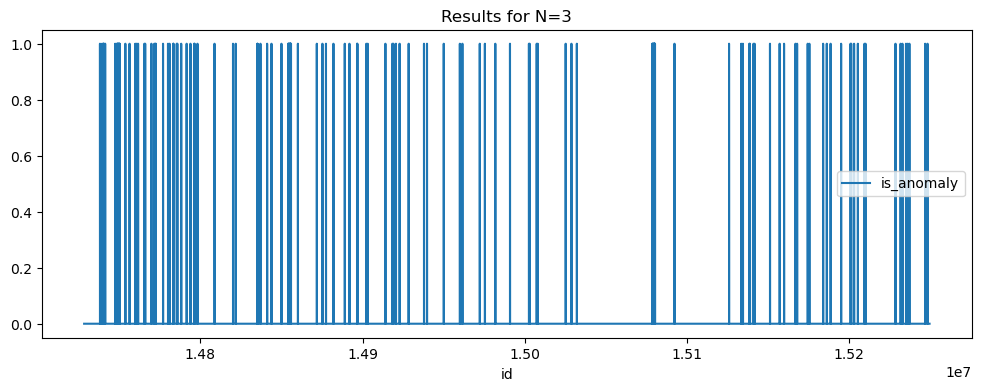

In [4]:
submission_N3 = localstd_submission(3)

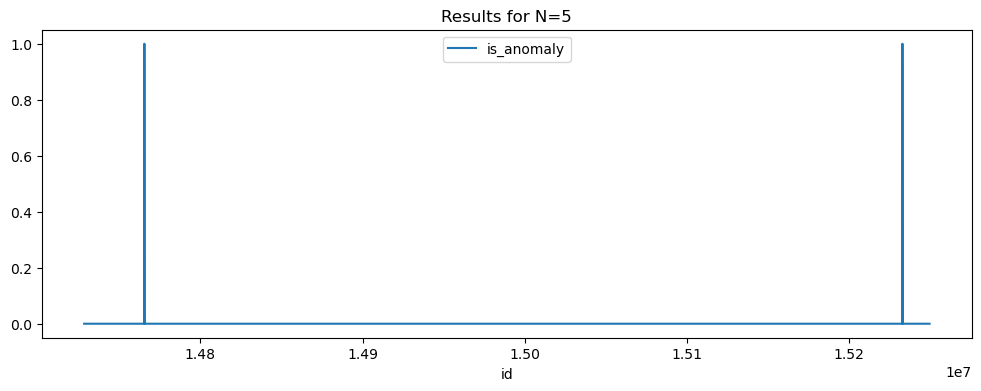

In [5]:
submission_N3 = localstd_submission(5)